# Covid-19 in the Philippines

Data as of January 15, 2022

Source: DOH Data Drop

Metadata: https://docs.google.com/spreadsheets/d/1rD77PMdxN6JMVeYmk7mvgDNtEHJt8Du6ozaLm_Qok0Q/edit#gid=1714687638

Download the CSV files from the DOH Data Drop and save them within the PATH. We'll start by combining the four CSVs into one data frame.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 1000)
df = pd.concat(
    map(pd.read_csv, ['DOH COVID Data Drop_ 20220115 - 04 Case Information_batch_0.csv', 'DOH COVID Data Drop_ 20220115 - 04 Case Information_batch_1.csv', 'DOH COVID Data Drop_ 20220115 - 04 Case Information_batch_2.csv', "DOH COVID Data Drop_ 20220115 - 04 Case Information_batch_3.csv"]), ignore_index=True)
df

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/core/reshape/concat.py:294: DtypeWarning: Columns (15,16) have mixed types.Specify dtype option on import or set low_memory=False.


,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateRepConf,DateDied,DateRecover,RemovalType,Admitted,RegionRes,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,DateOnset,Pregnanttab,ValidationStatus
0,C404174,38.0,35 to 39,FEMALE,NaN,2020-01-30,2020-01-30,NaN,NaN,RECOVERED,NaN,Region VII: Central Visayas,NEGROS ORIENTAL,DUMAGUETE CITY (CAPITAL),PH074610000,NaN,NaN,RECOVERED,NO,2020-01-21,NO,"Health Status is ""Recovered"", but no Date Reco..."
1,C462688,44.0,40 to 44,MALE,NaN,2020-01-30,2020-02-03,2020-02-01,NaN,DIED,NaN,Region VII: Central Visayas,NEGROS ORIENTAL,DUMAGUETE CITY (CAPITAL),PH074610000,NaN,NaN,DIED,NO,2020-01-18,NaN,NaN
2,C387710,60.0,60 to 64,FEMALE,2020-01-23,2020-01-30,2020-02-05,NaN,2020-01-31,RECOVERED,YES,Region VII: Central Visayas,BOHOL,PANGLAO,PH071233000,NaN,NaN,RECOVERED,NO,2020-01-21,NO,Case has Admitting Facility but is not Admitte...
3,C377460,49.0,45 to 49,MALE,NaN,NaN,2020-03-06,NaN,NaN,RECOVERED,YES,Region IV-A: CALABARZON,BATANGAS,SANTO TOMAS,PH041028000,NaN,NaN,RECOVERED,NO,NaN,NaN,"Removal Type is ""Recovered"", but no Recovered ..."
4,C498051,63.0,60 to 64,MALE,2020-03-05,NaN,2020-03-06,2020-03-11,NaN,DIED,NO,Region IV-A: CALABARZON,RIZAL,CAINTA,PH045805000,NaN,NaN,DIED,NO,NaN,NaN,"Case has Lab Result, but Result Date is blank"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3168374,C89880753,51.0,50 to 54,MALE,2022-01-12,2022-01-12,2022-01-15,NaN,NaN,NaN,NaN,NCR,NCR,CITY OF PASIG,PH137403000,SANTO TOMAS,PH137403026,MILD,NO,NaN,NaN,NaN
3168375,C68784492,32.0,30 to 34,MALE,2022-01-11,2022-01-12,2022-01-15,NaN,NaN,NaN,NaN,NCR,NCR,PASAY CITY,PH137605000,BARANGAY 14,PH137605014,MILD,NO,NaN,NaN,NaN
3168376,C6874448,59.0,55 to 59,MALE,2022-01-12,2022-01-13,2022-01-15,NaN,NaN,NaN,NaN,NCR,NCR,CITY OF VALENZUELA,PH137504000,KARUHATAN,PH137504008,MILD,NO,NaN,NaN,NaN
3168377,C44531764,37.0,35 to 39,FEMALE,2022-01-11,2022-01-12,2022-01-15,NaN,NaN,NaN,NaN,NCR,NCR,QUEZON CITY,PH137404000,BATASAN HILLS,PH137404139,MILD,NO,NaN,NO,NaN


We basically combined all four CSVs into one file. 
You can save this single file into a CSV if you want to. 

In [3]:
df.DateRepConf = pd.to_datetime(df.DateRepConf, format="%Y-%m-%d")
df.DateDied = pd.to_datetime(df.DateDied, format="%Y-%m-%d")
df.DateRecover = pd.to_datetime(df.DateRecover, format="%Y-%m-%d")
df.DateOnset = pd.to_datetime(df.DateOnset, format="%Y-%m-%d")
df.DateResultRelease = pd.to_datetime(df.DateResultRelease, format="%Y-%m-%d")
df.DateSpecimen = pd.to_datetime(df.DateSpecimen, format="%Y-%m-%d")

In [4]:
df.dtypes
#This checks whether we successfully converted the columns above into datetime.

CaseCode                     object
Age                         float64
AgeGroup                     object
Sex                          object
DateSpecimen         datetime64[ns]
DateResultRelease    datetime64[ns]
DateRepConf          datetime64[ns]
DateDied             datetime64[ns]
DateRecover          datetime64[ns]
RemovalType                  object
Admitted                     object
RegionRes                    object
ProvRes                      object
CityMunRes                   object
CityMuniPSGC                 object
BarangayRes                  object
BarangayPSGC                 object
HealthStatus                 object
Quarantined                  object
DateOnset            datetime64[ns]
Pregnanttab                  object
ValidationStatus             object
dtype: object

In [5]:
df['CityMunRes'] = df['CityMunRes'].str.capitalize()
df['ProvRes'] = df['ProvRes'].str.capitalize()

# Cleaning the data

## Looking for duplicates

Look for potential duplicates through the all columns. **True** means there are duplicates **across all columns.**

In [6]:
df.duplicated().value_counts()

False    3168364
True          15
dtype: int64

There are **15 duplicated records** found in the report. These duplicated records mean they have matching entries **across all columns**.

DOH, in its daily case reports, continuously clean the data and regularly reports and removes duplicates.

In the meantime, we will be **keeping the duplicates** for the purpose of our analysis. We are confident that because duplicates account for less than 1% of the total, it won't affect the overall Covid-19 picture.

In [12]:
#df[df.duplicated(keep='first')].sort_values('Age')
#This supposedly shows the duplicated entries arranged by 'Age'. Remember, these entries are checked similar
#across all columns in at least another entry. They are just arranged by age.

## Handling NaN values

There are also issues with **NaNs** which means there was no data input. One issue I stumbled upon quite belatedly was the fact that **'CaseCode'** indicator actually has a lot of null values (see below).

In [8]:
df.CaseCode.isna().value_counts()

False    3168379
Name: CaseCode, dtype: int64

No NaN detected as of this latest update. This means we can easily **resample** the cases.

Previously though, there were over **60,000** null values under **CaseCode** which prompted us to use other columns (**Sex**) to analyze. Below we see that the Sex column remains all filled.

In [9]:
df.Sex.isna().value_counts()

False    3168379
Name: Sex, dtype: int64

# Case data

Note: Just remove **.tail()** to get all dates here. **.tail()** shows the last entries while the number inside paranthesis signify how many last entries are shown. Default shows last 10 entries. Alternatively: **.head()**

## DateRepConf

Pertains to data when cases are publicly reported **(this is what is closely followed and reported in the media).** Caveat is this can include case positives from previous days because of delays in test processing and reporting.

For instance, cases may be reported on January 2, but based on testing data on December 31.

Furthemore, data from previous days may be subject to change as DOH said it is constantly reviewing the reports' veracity and removing some potential duplicates.

In [10]:
cases = df.resample('D', on='DateRepConf').Sex.count().to_frame().reset_index()
cases.tail()

,DateRepConf,Sex
712,2022-01-11,27973
713,2022-01-12,32192
714,2022-01-13,33985
715,2022-01-14,37184
716,2022-01-15,39004


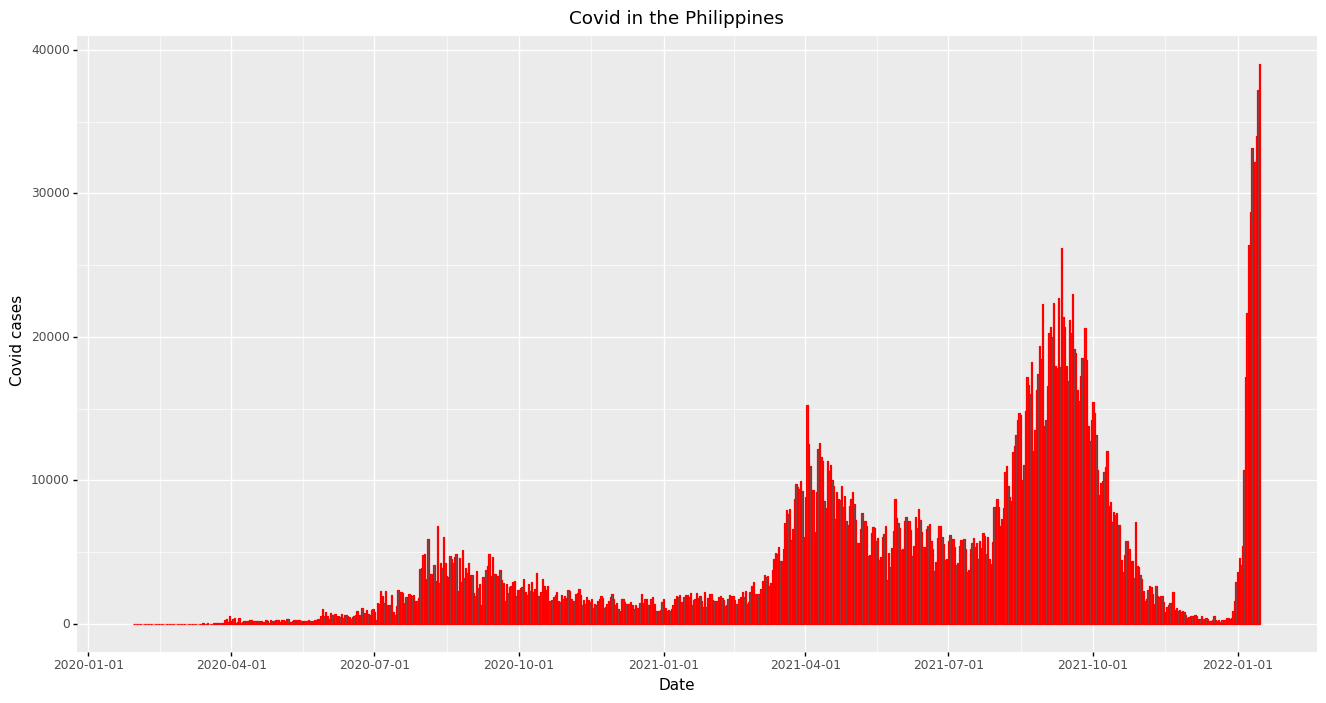

<ggplot: (343784142)>

In [11]:
(
    ggplot(cases, aes('DateRepConf', 'Sex')) +
           geom_col(color="red") +
           theme(figure_size=(16,8)) +
           labs(x= "Date", y="Covid cases", title="Covid in the Philippines")
)

# Two week rolling case average

You can change the time frame of the rolling average by changing the number of **days** inside the paranthesis after **rolling.**

In [13]:
df.resample('D', on='DateRepConf').Sex.count().rolling(14).mean().round().tail(20)

DateRepConf
2021-12-27      306.0
2021-12-28      319.0
2021-12-29      366.0
2021-12-30      461.0
2021-12-31      630.0
2022-01-01      867.0
2022-01-02     1181.0
2022-01-03     1453.0
2022-01-04     1829.0
2022-01-05     2579.0
2022-01-06     3785.0
2022-01-07     5312.0
2022-01-08     7168.0
2022-01-09     9185.0
2022-01-10    11528.0
2022-01-11    13497.0
2022-01-12    15733.0
2022-01-13    18045.0
2022-01-14    20491.0
2022-01-15    23019.0
Freq: D, Name: Sex, dtype: float64

In [14]:
case_roll = df.resample('D', on='DateRepConf').Sex.count().rolling(14).mean().to_frame().reset_index()
case_roll.tail(10)

,DateRepConf,Sex
707,2022-01-06,3785.428571
708,2022-01-07,5312.357143
709,2022-01-08,7167.857143
710,2022-01-09,9185.071429
711,2022-01-10,11528.428571
712,2022-01-11,13497.214286
713,2022-01-12,15733.285714
714,2022-01-13,18045.142857
715,2022-01-14,20490.785714
716,2022-01-15,23018.714286


/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/layer.py:381: PlotnineWarning: position_stack : Removed 13 rows containing missing values.


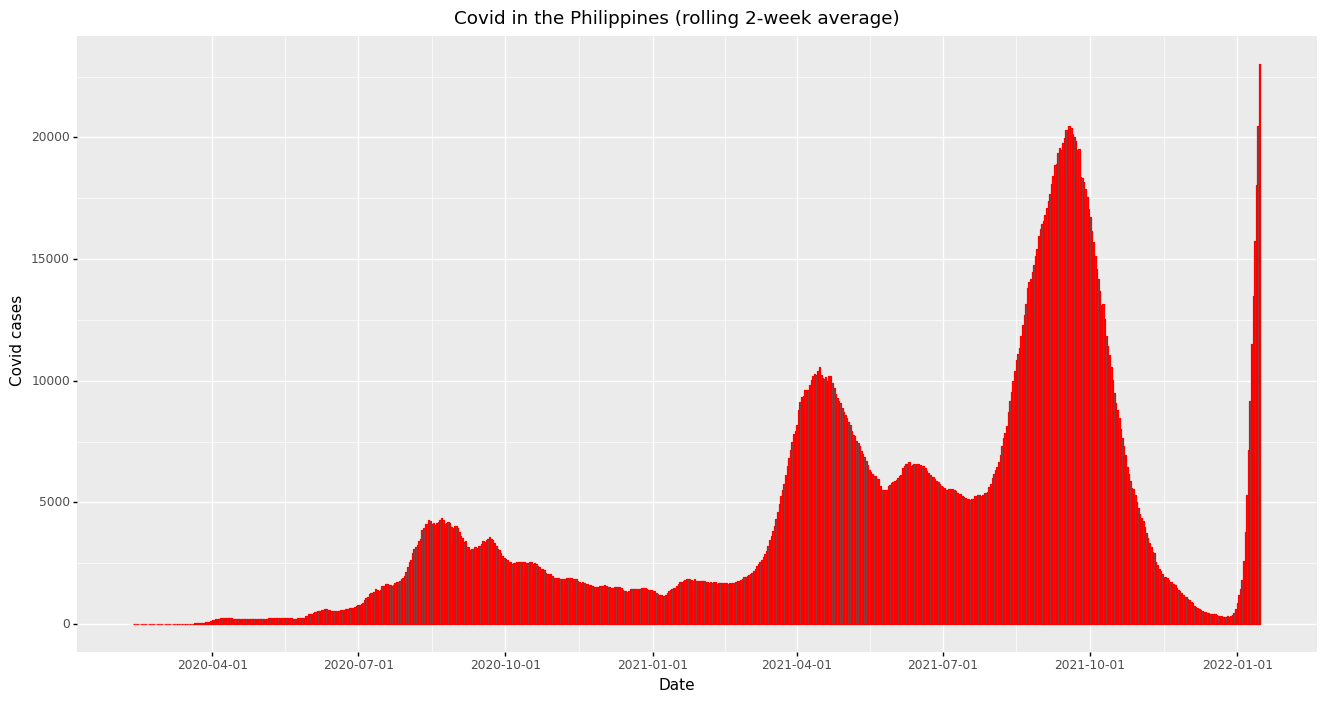

<ggplot: (297003726)>

In [15]:
(
    ggplot(case_roll, aes('DateRepConf', 'Sex')) +
           geom_col(color="red") +
           theme(figure_size=(16,8)) +
           labs(x= "Date", y="Covid cases", title="Covid in the Philippines (rolling 2-week average)")
)

## DateOnset

Pertains to cases when date of illness or when symptoms manifest. Sometimes, people are not tested until cases manifest and processing of cases take time. DateOnset records cases based on when the illness first manifested, not when test results were released.

DOH said when DateOnset cannot be confirmed, the agency uses DateSpecimen (date of specimen collection for testing, see below) as proxy.

In [16]:
df.resample('D', on='DateOnset').Sex.count().tail(10)

DateOnset
2022-01-05    5086
2022-01-06    5145
2022-01-07    5757
2022-01-08    4549
2022-01-09    3177
2022-01-10    4825
2022-01-11    3041
2022-01-12    2024
2022-01-13     424
2022-01-14      78
Name: Sex, dtype: int64

## DateSpecimen

Pertains to when specimen was collected from suspected case for Covid-19 testing. Data show those who tested positive after testing, but date used to report case is based on when the specimen is collected, instead of when results came out positive.

DOH said when DateOnset cannot be confirmed, the agency uses DateSpecimen (date of specimen collection for testing) as proxy.

In [17]:
df.resample('D', on='DateSpecimen').Sex.count().tail(10)

DateSpecimen
2022-01-05    34681
2022-01-06    35224
2022-01-07    36777
2022-01-08    26042
2022-01-09    15929
2022-01-10    38079
2022-01-11    29952
2022-01-12    20428
2022-01-13     5232
2022-01-14        5
Name: Sex, dtype: int64

## DateRecover

Pertains to date when cases recovered from Covid-19. Not used in reporting "recoveries" data every day. 

In [18]:
df[df.HealthStatus=="RECOVERED"].resample('D', on='DateRepConf').size().tail(10)

DateRepConf
2022-01-06    12519
2022-01-07     6128
2022-01-08     1229
2022-01-09      998
2022-01-10      364
2022-01-11      381
2022-01-12      267
2022-01-13      205
2022-01-14      227
2022-01-15      196
Freq: D, dtype: int64

## DateDied

Pertains to date when cases died from Covid-19. Not used in reporting "deaths" data every day. 

In [19]:
df[df.RemovalType=="DIED"].resample('D', on='DateDied').size().tail(10)

DateDied
2022-01-04    13
2022-01-05     5
2022-01-06    16
2022-01-07    15
2022-01-08     9
2022-01-09    15
2022-01-10    34
2022-01-11    14
2022-01-12    22
2022-01-13    13
dtype: int64

Note: Clearly when used to resample, DateRecovered and DateDied columns underestimate both figures as reported. This can be due to a number of reasons, including some deaths and recoveries bearing no date.

# Which regions have the highest number of Covid-19 cases so far?

In [20]:
df.RegionRes.value_counts(dropna=False)
#ROF stands for returning overseas Filipinos
#Over 3,700 (0.11%) have no indicated regional location.

NCR                               1048701
Region IV-A: CALABARZON            567407
Region III: Central Luzon          313600
Region VII: Central Visayas        158448
Region VI: Western Visayas         157990
Region II: Cagayan Valley          143326
Region I: Ilocos Region            110679
Region XI: Davao Region            108994
CAR                                 96839
Region X: Northern Mindanao         87453
Region XII: SOCCSKSARGEN            61320
Region VIII: Eastern Visayas        55695
Region V: Bicol Region              55562
Region IX: Zamboanga Peninsula      55015
CARAGA                              51926
Region IV-B: MIMAROPA               39017
ROF                                 32082
BARMM                               20582
NaN                                  3743
Name: RegionRes, dtype: int64

Interpretation: Half of Covid-19 cases were detected in Metro Manila and Calabarzon.

# Which provinces have the highest number of Covid-19 cases so far?

In [21]:
df.ProvRes.value_counts(dropna=False).head(10)
#Over 43,000 (1.4%) have no information into provincial location.

Ncr              1041931
Cavite            187363
Laguna            140011
Rizal             124712
Bulacan           122126
Cebu              111991
Batangas           81271
Pampanga           75726
Davao del sur      68449
Isabela            61703
Name: ProvRes, dtype: int64

# Which municipalities?

In [22]:
df.CityMunRes.value_counts(dropna=False).head(15)
#Over 58,000 (nearly 2%) people infected have no information on their municipal location.

Quezon city            218583
City of manila         131388
Caloocan city           76235
City of pasig           74995
Taguig city             73401
City of makati          72463
City of parañaque       61240
NaN                     58089
Davao city              56398
Pasay city              46495
City of valenzuela      45850
Cebu city (capital)     44216
City of las piñas       43445
City of mandaluyong     41923
City of muntinlupa      35748
Name: CityMunRes, dtype: int64

Interpretation: Seven cities from Metro Manila top the list of number of people infected with Covid-19. Davao City in Mindanao follow them.

# Track cases per day per province

Warning: This can be quite heavy because of the number of provinces (87) involved. But the beauty of this is you can save this df into a separate CSV (using the df name **'df_prov'**) if you'd like. 

Code also applicable to municipal, regional and barangay level. But be careful as the data get more granular as there could be some problem (see below).

### Wide data (pivot table)

In [23]:
df_prov = df.pivot_table(columns="ProvRes", index='DateRepConf', values='Sex', aggfunc='count', fill_value='0', dropna=False).reset_index()
df_prov.head(10)

ProvRes,DateRepConf,Abra,Agusan del norte,Agusan del sur,Aklan,Albay,Antique,Apayao,Aurora,Basilan,Bataan,Batanes,Batangas,Benguet,Biliran,Bohol,Bukidnon,Bulacan,Cagayan,Camarines norte,Camarines sur,Camiguin,Capiz,Catanduanes,Cavite,Cebu,City of isabela (not a province),Cotabato (north cotabato),Cotabato city (not a province),Davao de oro,Davao del norte,Davao del sur,Davao occidental,Davao oriental,Dinagat islands,Eastern samar,Guimaras,Ifugao,Ilocos norte,Ilocos sur,Iloilo,Isabela,Kalinga,La union,Laguna,Lanao del norte,Lanao del sur,Leyte,Maguindanao,Marinduque,Masbate,Misamis occidental,Misamis oriental,Mountain province,Ncr,Negros occidental,Negros oriental,Northern samar,Nueva ecija,Nueva vizcaya,Occidental mindoro,Oriental mindoro,Palawan,Pampanga,Pangasinan,Quezon,Quirino,Rizal,Romblon,Samar (western samar),Sarangani,Siquijor,Sorsogon,South cotabato,Southern leyte,Sultan kudarat,Sulu,Surigao del norte,Surigao del sur,Tarlac,Tawi-tawi,Zambales,Zamboanga del norte,Zamboanga del sur,Zamboanga sibugay
0,2020-01-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-02-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-02-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-03-06,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-03-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2020-03-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2020-03-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2020-03-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0
8,2020-03-11,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2020-03-12,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Long data

We create a **new dataframe** for plotnine later. Long data is always preferred when processing using plotnine.

In [24]:
df_prov2 = pd.melt(df_prov, id_vars=['DateRepConf'], value_name='sex', var_name='province').sort_values('province')

In [26]:
df_prov2.sex = df_prov2.sex.astype(int)
df_prov2

,DateRepConf,province,sex
0,2020-01-30,Abra,0
451,2021-05-28,Abra,40
452,2021-05-29,Abra,10
453,2021-05-30,Abra,17
454,2021-05-31,Abra,39
...,...,...,...
57001,2020-10-18,Zamboanga sibugay,4
57002,2020-10-19,Zamboanga sibugay,0
57003,2020-10-20,Zamboanga sibugay,0
56995,2020-10-12,Zamboanga sibugay,2


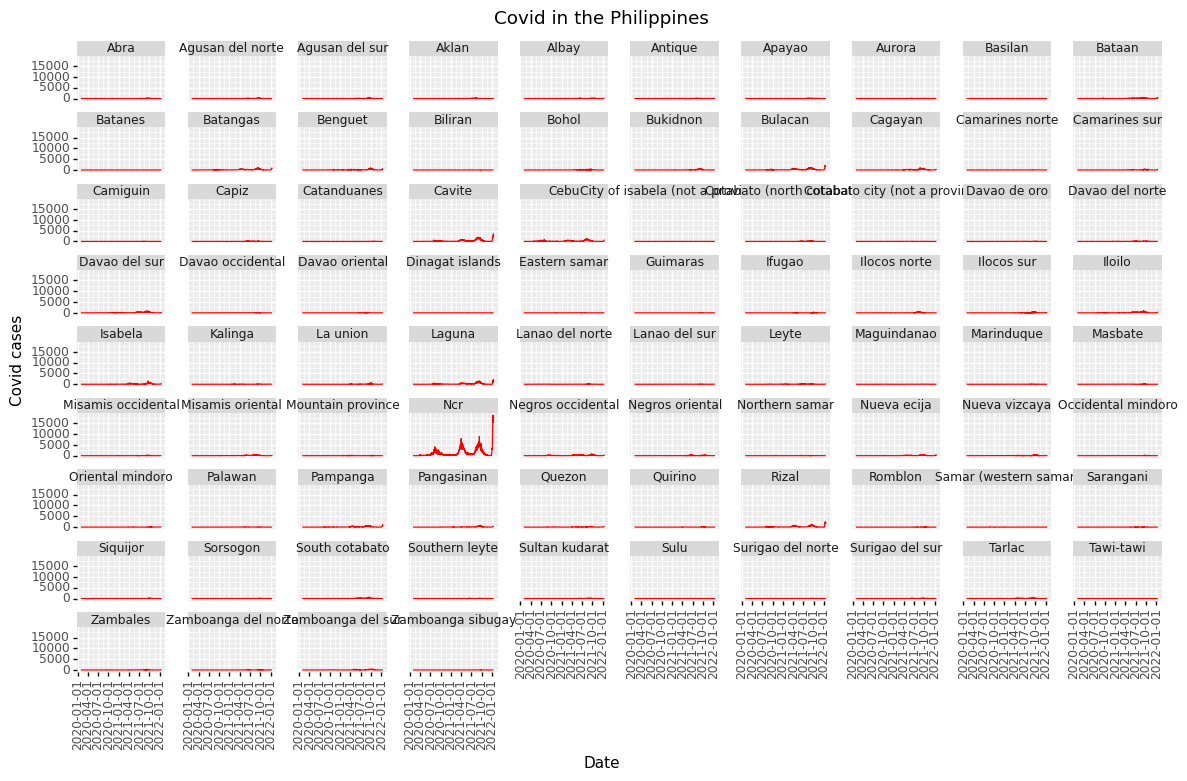

<ggplot: (343900173)>

In [27]:
#Plotnine chart
(
    ggplot(df_prov2, aes('DateRepConf', 'sex')) +
           geom_line(color="red") +
           theme(figure_size=(14,8)) +
           facet_wrap('province') +
           theme(subplots_adjust={'wspace': 0.25}, axis_text_x=element_text(rotation=90)) +
           labs(x= "Date", y="Covid cases", title="Covid in the Philippines")
)

# Track cases per day region

### Wide data 

Similar with provincial data. We have to go through this process to be able to extract **long data** since we would have to fill some null values.

In [28]:
df_reg = df.pivot_table(columns="RegionRes", index='DateRepConf', values='Sex', aggfunc='count', fill_value='0', dropna=False).reset_index()
df_reg.head(10)

RegionRes,DateRepConf,BARMM,CAR,CARAGA,NCR,ROF,Region I: Ilocos Region,Region II: Cagayan Valley,Region III: Central Luzon,Region IV-A: CALABARZON,Region IV-B: MIMAROPA,Region IX: Zamboanga Peninsula,Region V: Bicol Region,Region VI: Western Visayas,Region VII: Central Visayas,Region VIII: Eastern Visayas,Region X: Northern Mindanao,Region XI: Davao Region,Region XII: SOCCSKSARGEN
0,2020-01-30,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0
1,2020-02-03,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0
2,2020-02-05,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0
3,2020-03-06,0,0,0,0,0,0,0,0,2.0,0,0,0,0,0,0,0,0,0
4,2020-03-07,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0
5,2020-03-08,0,0,0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2020-03-09,0,0,0,11.0,1.0,0,0,1.0,1.0,0,0,0,0,0,0,0,0,0
7,2020-03-10,0,0,0,7.0,0,0,0,1.0,0,0,0,1.0,0,0,0,0,0,0
8,2020-03-11,0,0,0,13.0,1.0,0,0,0,1.0,0,0,0,0,1.0,0,0,0,0
9,2020-03-12,0,0,0,2.0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0


### Long data

We create a new data frame solely for regional data only for processing later with plotnine for charts.

In [29]:
df_reg2 = pd.melt(df_reg, id_vars=['DateRepConf'], value_name='sex', var_name='province').sort_values('province')
df_reg2.sex = df_reg2.sex.astype(int)
df_reg2

,DateRepConf,province,sex
0,2020-01-30,BARMM,0
451,2021-05-28,BARMM,108
452,2021-05-29,BARMM,103
453,2021-05-30,BARMM,135
454,2021-05-31,BARMM,114
...,...,...,...
11857,2020-10-18,Region XII: SOCCSKSARGEN,44
11858,2020-10-19,Region XII: SOCCSKSARGEN,27
11859,2020-10-20,Region XII: SOCCSKSARGEN,10
11851,2020-10-12,Region XII: SOCCSKSARGEN,23


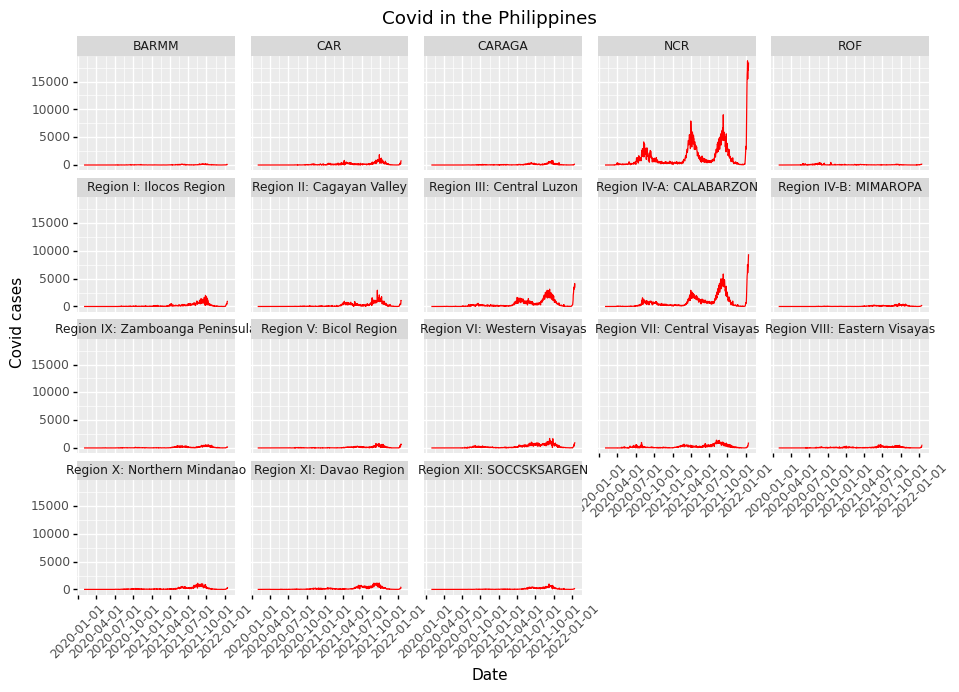

<ggplot: (346834437)>

In [30]:
(
    ggplot(df_reg2, aes('DateRepConf', 'sex')) +
           geom_line(color="red") +
           theme(figure_size=(11,7)) +
           facet_wrap('province') +
           theme(subplots_adjust={'wspace': 0.1}, axis_text_x=element_text(rotation=45)) +
           labs(x= "Date", y="Covid cases", title="Covid in the Philippines")
)

# By municipality

This is quite heavy and would need some extensive data cleaning because of some municipalities with the same names. Remove the hashtags to run.

In [32]:
#df_munc = df.CityMunRes.value_counts().sort_index()
#df_munc = df.groupby("ProvRes").CityMunRes.value_counts().sort_index()
#df_munc

# How is a location's infection tally through time (one loc at a time)?

Applicable for provinces, municipalities, regions.

In [33]:
#Example for region
df[df.RegionRes=="NCR"].resample('D', on='DateRepConf').Sex.count().tail(10)

DateRepConf
2022-01-06    11664
2022-01-07    13731
2022-01-08    16305
2022-01-09    17081
2022-01-10    18731
2022-01-11    15472
2022-01-12    18238
2022-01-13    17092
2022-01-14    17076
2022-01-15    18422
Freq: D, Name: Sex, dtype: int64

In [34]:
#Example for municipalities
df[df.CityMunRes=="Quezon city"].resample('D', on='DateRepConf').Sex.count().tail(10)

DateRepConf
2022-01-06    2399
2022-01-07    3106
2022-01-08    3511
2022-01-09    3677
2022-01-10    4701
2022-01-11    3168
2022-01-12    4230
2022-01-13    3806
2022-01-14    3965
2022-01-15    3901
Freq: D, Name: Sex, dtype: int64

<AxesSubplot:title={'center':'QC cases'}, xlabel='DateRepConf'>

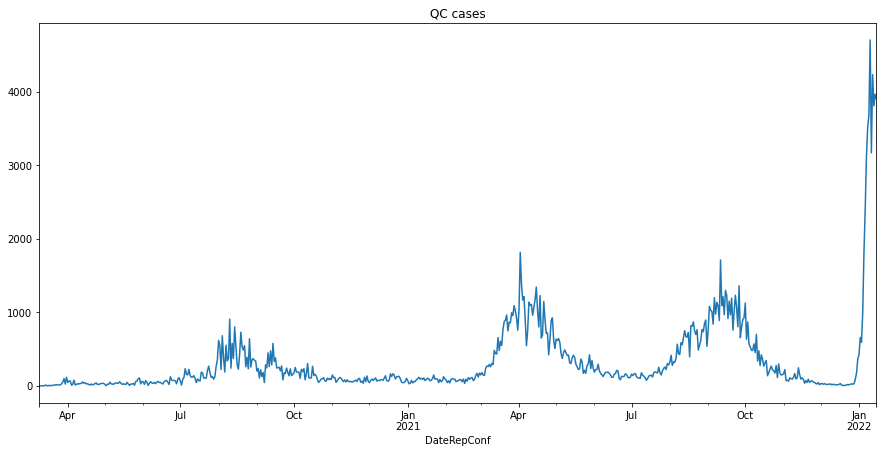

In [35]:
#Not plotnine but can be made one if made into a single df.
df[df.CityMunRes=="Quezon city"].resample('D', on='DateRepConf').Sex.count().plot(title="QC cases", figsize = (15, 7))

# How young/old are the infected?

In [36]:
df.AgeGroup.value_counts(normalize=True, dropna=False)*100
#0.1% of people infected did not indicate age.

25 to 29    14.200416
30 to 34    12.610423
20 to 24    10.234824
35 to 39     9.729613
40 to 44     8.328391
45 to 49     6.889075
50 to 54     6.406778
55 to 59     5.712858
60 to 64     4.524175
15 to 19     4.444197
65 to 69     3.406379
10 to 14     3.085805
70 to 74     2.476692
5 to 9       2.345079
0 to 4       2.269331
80+          1.772200
75 to 79     1.477159
NaN          0.086606
Name: AgeGroup, dtype: float64

# How many males and females? How many are admitted to hospital?

**normalize=True** will get you the percentage share.

In [37]:
df.Sex.value_counts(dropna=False, normalize=True) * 100
#Nearly equal number of females and males infected with Covid-19

FEMALE    50.416948
MALE      49.583052
Name: Sex, dtype: float64

In [38]:
df.Admitted.value_counts(dropna=False)
#NaN means no answer

NaN    2107798
NO      949569
YES     111012
Name: Admitted, dtype: int64

# Testing

We now go to testing data, which is contained in a separate CSV file from the DOH Data Drop. We read through the file first.

Notice again how there are **NaNs** in some rows. Some of them you can ignore because of the type of data (i.e. **daily_output_unique_individuals** where NaN essentially means there were no test conducted that day.

You can check whether they have a significant impact on the broader picture by running **isna** in certain columns or putting **dropna=False** in your **value_counts**.

Try this:
df[df.daily_output_unique_individuals.isna()]

In [39]:
df_test = pd.read_csv("DOH COVID Data Drop_20220115 - 07 Testing Aggregates.csv")
df_test

,facility_name,report_date,avg_turnaround_time,daily_output_samples_tested,daily_output_unique_individuals,daily_output_positive_individuals,daily_output_negative_individuals,daily_output_equivocal,daily_output_invalid,remaining_available_tests,backlogs,cumulative_samples_tested,cumulative_unique_individuals,cumulative_positive_individuals,cumulative_negative_individuals,pct_positive_cumulative,pct_negative_cumulative,validation_status
0,A Star Laboratories,2020-12-08,24.0,15.0,15.0,1.0,14.0,0.0,0.0,8.0,0.0,15,15,1,14,0.07,0.93,NaN
1,A Star Laboratories,2020-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
2,A Star Laboratories,2020-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
3,A Star Laboratories,2020-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
4,A Star Laboratories,2020-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125694,Zamboanga del Sur Medical Center PCR Laboratory,2022-01-10,48.0,10.0,10.0,9.0,1.0,0.0,0.0,7086.0,0.0,34500,34155,8895,25260,0.26,0.74,NaN
125695,Zamboanga del Sur Medical Center PCR Laboratory,2022-01-11,48.0,65.0,65.0,37.0,28.0,0.0,0.0,7001.0,0.0,34565,34220,8932,25288,0.26,0.74,NaN
125696,Zamboanga del Sur Medical Center PCR Laboratory,2022-01-12,48.0,88.0,88.0,45.0,43.0,0.0,0.0,6893.0,0.0,34653,34308,8977,25331,0.26,0.74,NaN
125697,Zamboanga del Sur Medical Center PCR Laboratory,2022-01-13,48.0,126.0,126.0,79.0,47.0,0.0,0.0,6737.0,0.0,34779,34434,9056,25378,0.26,0.74,NaN


# Transform dates to datetime format

In [41]:
df_test.report_date = pd.to_datetime(df_test.report_date, format="%Y-%m-%d", errors="coerce")

# Look for null values

Again, nulls are not counted when resampling.

In [42]:
df_test.daily_output_unique_individuals.isna().value_counts()
#By individuals tested, nealry 9,900 had no values.

False    115802
True       9897
Name: daily_output_unique_individuals, dtype: int64

In [43]:
df_test.daily_output_samples_tested.isna().value_counts()
#Same with samples.

False    115800
True       9899
Name: daily_output_samples_tested, dtype: int64

# Total number of people tested for Covid-19 daily

In [45]:
#Creating a new data frame for processing with plotnine
daily_test = df_test.resample('D', on='report_date').daily_output_unique_individuals.sum().to_frame().reset_index()
daily_test.tail(12)
#shows last 12 days.

,report_date,daily_output_unique_individuals
640,2022-01-03,46859.0
641,2022-01-04,67003.0
642,2022-01-05,73893.0
643,2022-01-06,79777.0
644,2022-01-07,81587.0
645,2022-01-08,77262.0
646,2022-01-09,63112.0
647,2022-01-10,68097.0
648,2022-01-11,81201.0
649,2022-01-12,83374.0


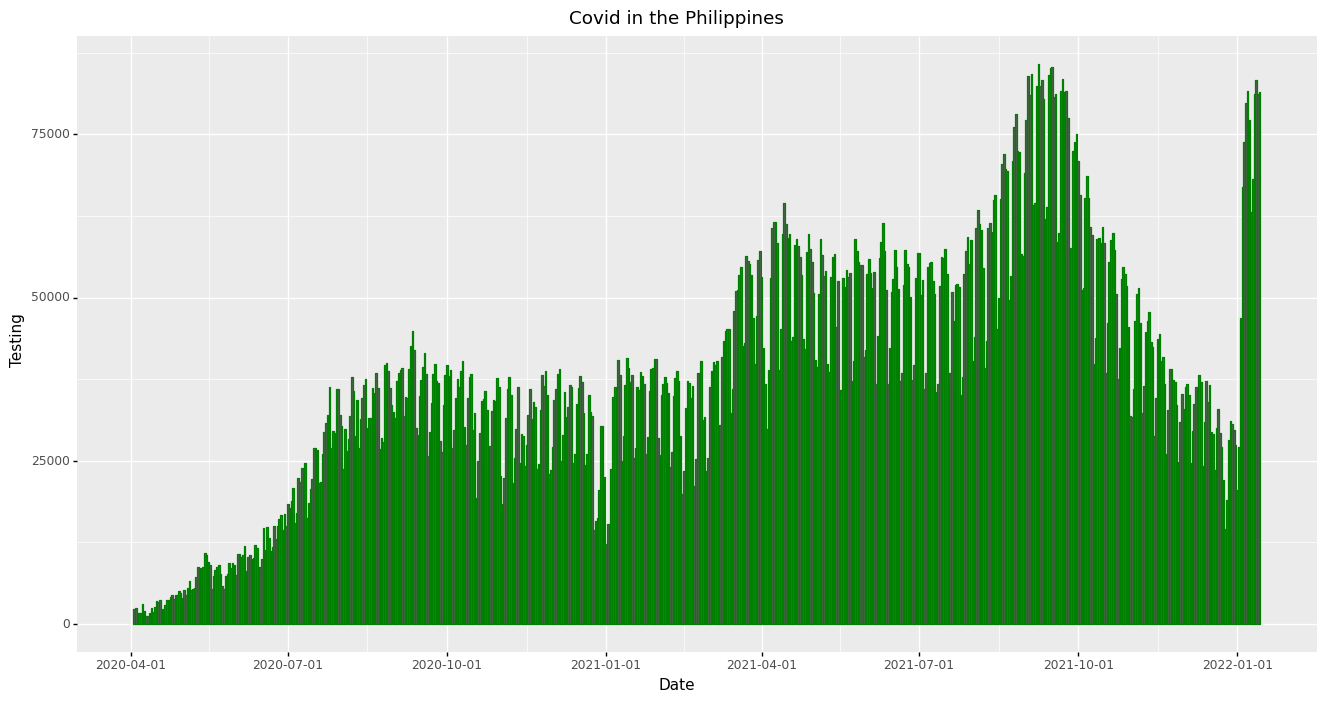

<ggplot: (347558282)>

In [46]:
#Plotnine chart
(
    ggplot(daily_test, aes('report_date', 'daily_output_unique_individuals')) +
           geom_col(color="green") +
           theme(figure_size=(16,8)) +
           labs(x= "Date", y="Testing", title="Covid in the Philippines")
)

Interpretation: Number of people getting tested for Covid-19 daily have gone down
from their September peak of about 80,000 during a surge. 

# Total samples tested each day

Number of samples may differ from number of individuals tested because some people undertake more than one test for confirmation.

Shows last 15 days.

In [47]:
df_test.resample('D', on='report_date').daily_output_samples_tested.sum().tail(15)

report_date
2021-12-31    28839.0
2022-01-01    21227.0
2022-01-02    28725.0
2022-01-03    50017.0
2022-01-04    70620.0
2022-01-05    78809.0
2022-01-06    83783.0
2022-01-07    86097.0
2022-01-08    81797.0
2022-01-09    68491.0
2022-01-10    71269.0
2022-01-11    84912.0
2022-01-12    87080.0
2022-01-13    85702.0
2022-01-14    86000.0
Freq: D, Name: daily_output_samples_tested, dtype: float64

# Two-week rolling average in testing

Shows last 10 days.

In [50]:
df_test.resample('D', on='report_date').daily_output_unique_individuals.sum().rolling(14).mean().round().tail(10)

report_date
2022-01-05    33225.0
2022-01-06    36991.0
2022-01-07    41247.0
2022-01-08    45731.0
2022-01-09    48887.0
2022-01-10    51734.0
2022-01-11    55308.0
2022-01-12    59078.0
2022-01-13    62747.0
2022-01-14    66607.0
Freq: D, Name: daily_output_unique_individuals, dtype: float64

<AxesSubplot:title={'center':'Two week rolling average in testing'}, xlabel='report_date'>

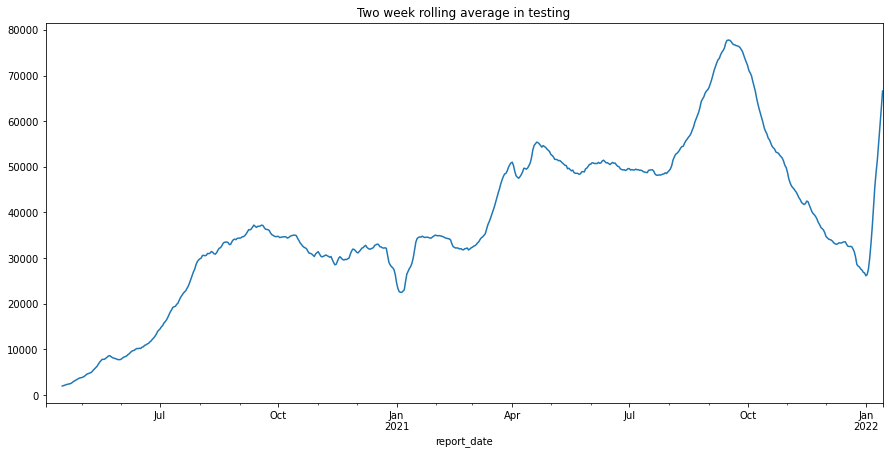

In [51]:
df_test.resample('D', on='report_date').daily_output_unique_individuals.sum().rolling(14).mean().plot(title='Two week rolling average in testing', figsize = (15, 7))


# How many people are tested each month?

### Monthly totals arranged from highest to lowest

Remove **sort_values(ascending=False)** to arrange it by date.

In [52]:
df_test.resample('M', on='report_date').daily_output_unique_individuals.sum().sort_values(ascending=False)

report_date
2021-09-30    2270631.0
2021-08-31    1876508.0
2021-10-31    1674413.0
2021-04-30    1571579.0
2021-07-31    1534758.0
2021-05-31    1525652.0
2021-06-30    1511158.0
2021-03-31    1378529.0
2021-11-30    1160857.0
2020-09-30    1073189.0
2020-10-31    1027587.0
2020-08-31    1017208.0
2021-01-31    1013076.0
2021-12-31     943242.0
2022-01-31     932492.0
2020-12-31     929690.0
2021-02-28     906997.0
2020-11-30     894039.0
2020-07-31     768793.0
2020-06-30     360407.0
2020-05-31     232175.0
2020-04-30      81089.0
Name: daily_output_unique_individuals, dtype: float64

<AxesSubplot:title={'center':'Testing slumps below 100k in Dec 2021'}, xlabel='report_date'>

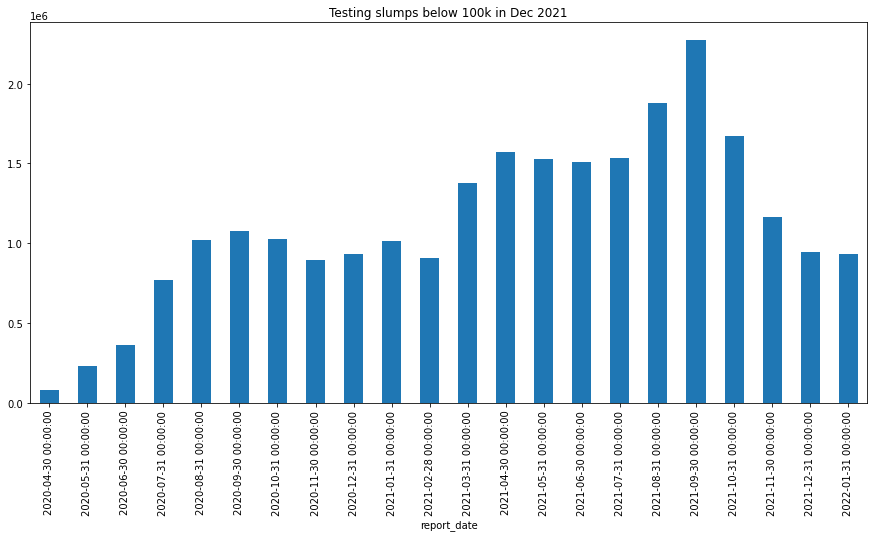

In [53]:
df_test.resample('M', on='report_date').daily_output_unique_individuals.sum().plot(kind="bar", title="Testing slumps below 100k in Dec 2021", figsize = (15, 7))


# Where do most positive individuals get tested?

Top 15

### Cumulative

In [54]:
df_test.groupby("facility_name").daily_output_positive_individuals.sum().sort_values(ascending=False).head(15)

facility_name
Detoxicare Molecular Diagnostics Laboratory                               167565.0
Philippine Red Cross - Port Area                                          167320.0
Philippine Red Cross (PRC)                                                 96364.0
Research Institute for Tropical Medicine (RITM)                            76879.0
Baguio General Hospital and Medical Center                                 73492.0
Philippine Red Cross Logistics & Multipurpose Center                       72647.0
Jose B. Lingad Memorial General Hospital                                   66130.0
Chinese General Hospital                                                   60553.0
Cebu TB Reference Laboratory - Molecular Facility for COVID-19 Testing     59453.0
Cagayan Valley Medical Center Molecular Laboratory                         56096.0
Southern Philippines Medical Center (SPMC)                                 52371.0
Ilocos Training and Regional Medical Center                              

### Monthly 

Ranked from highest to lowest number of tests.

In [55]:
df_test.groupby("facility_name").resample('M', on='report_date').daily_output_positive_individuals.sum().sort_values(ascending=False).head(15)


facility_name                                   report_date
Philippine Red Cross - Port Area                2021-09-30     27547.0
                                                2021-08-31     23943.0
Detoxicare Molecular Diagnostics Laboratory     2022-01-31     21602.0
                                                2021-09-30     21316.0
Philippine Red Cross - Port Area                2021-04-30     20038.0
Detoxicare Molecular Diagnostics Laboratory     2021-04-30     18665.0
Philippine Red Cross (PRC)                      2021-09-30     18480.0
Ilocos Training and Regional Medical Center     2021-09-30     17270.0
Philippine Red Cross - Port Area                2022-01-31     17129.0
Baguio General Hospital and Medical Center      2021-09-30     15865.0
Philippine Red Cross - Port Area                2021-03-31     15852.0
Detoxicare Molecular Diagnostics Laboratory     2020-08-31     15315.0
                                                2020-07-31     13384.0
                 

### Per testing site per month

Just change the name of the testing site after **df2.facility_name** to check other facilities.
Data show total monthly tests conducted per each facility.

Make it per day by just changing **'M'** in **resample** to **'D'**.

In [56]:
df_test[df_test.facility_name=="Philippine Red Cross - Port Area"].resample('M', on='report_date').daily_output_positive_individuals.sum()


report_date
2020-05-31      205.0
2020-06-30      482.0
2020-07-31     7488.0
2020-08-31    10269.0
2020-09-30     8200.0
2020-10-31     1880.0
2020-11-30     2090.0
2020-12-31     2090.0
2021-01-31     1585.0
2021-02-28     3189.0
2021-03-31    15852.0
2021-04-30    20038.0
2021-05-31     8407.0
2021-06-30     4583.0
2021-07-31     5584.0
2021-08-31    23943.0
2021-09-30    27547.0
2021-10-31     4570.0
2021-11-30     1031.0
2021-12-31     1158.0
2022-01-31    17129.0
Freq: M, Name: daily_output_positive_individuals, dtype: float64

# How many individuals test positive every day?

In [58]:
df_test.resample('D', on='report_date').daily_output_positive_individuals.sum().tail(15)

report_date
2021-12-31     5482.0
2022-01-01     4284.0
2022-01-02     7434.0
2022-01-03    15230.0
2022-01-04    25101.0
2022-01-05    29929.0
2022-01-06    35250.0
2022-01-07    36044.0
2022-01-08    35426.0
2022-01-09    28300.0
2022-01-10    31658.0
2022-01-11    38963.0
2022-01-12    39432.0
2022-01-13    38322.0
2022-01-14    38605.0
Freq: D, Name: daily_output_positive_individuals, dtype: float64

# Turnaround time

The number of people that test positive each day does not match cases reported each day. And it's partly because of delays in testing results. Hence some results reported today could be from tests days ago. What's the average turnaround time in hours for tests?

In [59]:
df_test.avg_turnaround_time.value_counts().head(3)

48.0    36982
24.0    31198
72.0     7746
Name: avg_turnaround_time, dtype: int64

# Positivity rate

Computed by dividing the number of positive tests out of the total tests conducted each day. The World Health Organization considers 5% and below positivity rate as the virus spread being under control.

### Daily

We make a new dataframe for positivity rate for faster processing of data in succeeding analysis.
(Also, it throws an error merely putting **.plot()** at this code so making a new df for this solve that problem.
Below we only show the positivity rate for the last 30 days.

In [61]:
#Creating a new df to process in plotnine
df_pos = df_test.resample('D', on='report_date').daily_output_positive_individuals.sum() / df_test.resample('D', on='report_date').daily_output_unique_individuals.sum() * 100
df_pos2 = df_pos.to_frame().reset_index()

#Renaming the columns because one of them is '0'
df_pos2.columns = ['date', 'testing']
df_pos2.tail(10)


,date,testing
642,2022-01-05,40.503160
643,2022-01-06,44.185668
644,2022-01-07,44.178607
645,2022-01-08,45.851777
646,2022-01-09,44.840918
647,2022-01-10,46.489566
648,2022-01-11,47.983399
649,2022-01-12,47.295320
650,2022-01-13,47.234719
651,2022-01-14,47.398340


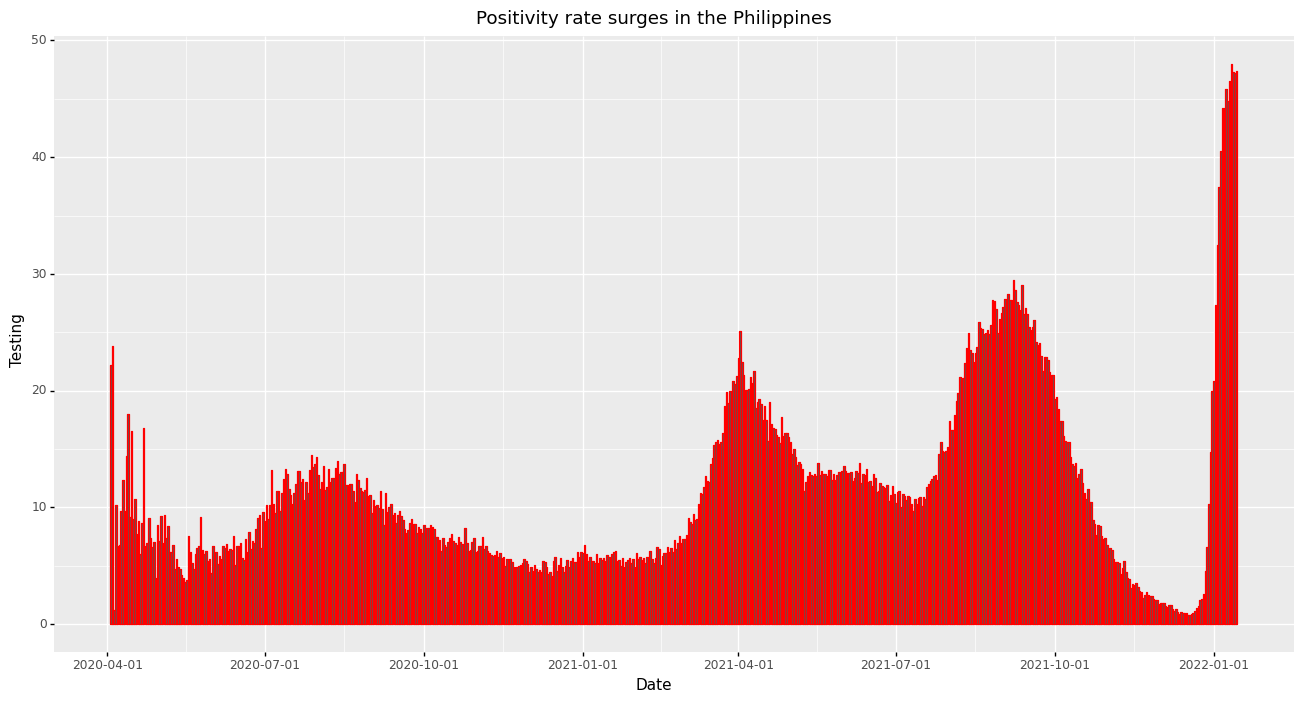

<ggplot: (347688366)>

In [62]:
(
    ggplot(df_pos2, aes('date', 'testing')) +
           geom_col(color="red") +
           theme(figure_size=(16,8)) +
           labs(x= "Date", y="Testing", title="Positivity rate surges in the Philippines")
)

# Save to CSVs

Just remove the hashtags!

While your testing data is in one CSV, cases are not. So now, you have the option to save it into one CSV. Note that you do not need to do this if you're using the dataframes (df) you generated above to process the data in Jupyter Notebook anytime.

### Entire case file from DOH

In [63]:
#df.to_csv("covidcases.csv", index=False)
#pd.read_csv("covidcases.csv")

### Provincial cases per day

In [64]:
#df_prov.to_csv("covid_prov.csv")
#pd.read_csv("covid_prov.csv")

### Municipal cases total

In [59]:
#df_munc.to_csv("covid_munc.csv")
#pd.read_csv("covid_munc.csv")